In [1]:
import ezdxf
import re
from ortools.sat.python import cp_model
import matplotlib.pyplot as plt
import numpy as np

from shapely.geometry import Point, LineString, box
from shapely.geometry import Polygon,MultiPoint  

In [2]:
#### 讀取dxf檔
tmp_doc = ezdxf.readfile("revise.dxf")

In [3]:
##### 讀取dxf檔內的所有繪圖訊息
for entity in tmp_doc.entities:
    start = entity.dxf.start # 線段起始座標
    end = entity.dxf.end # 線段終點座標
    #color = entity.dxf.color # 線段顏色
    layer = entity.dxf.layer # 線段所屬layer
    print("起點座標：", start)
    print("終點座標：", end)
    #print("顏色：", color)
    print('layer：',layer)

起點座標： (2788.54, 2485.860000000001, 0.0)
終點座標： (2788.54, 2338.75, 0.0)
layer： feasible_area
起點座標： (1476.38, 2485.860000000001, 0.0)
終點座標： (2788.54, 2485.860000000001, 0.0)
layer： feasible_area
起點座標： (1476.38, 2485.860000000001, 0.0)
終點座標： (1476.38, 2340.110000000001, 0.0)
layer： feasible_area
起點座標： (1210.31, 2459.98, 0.0)
終點座標： (1210.31, 1423.87, 0.0)
layer： feasible_area
起點座標： (1210.31, 1423.87, 0.0)
終點座標： (2240.990954989486, 1424.076660967787, 0.0)
layer： feasible_area
起點座標： (2241.42, 1525.12, 0.0)
終點座標： (2619.64, 1525.12, 0.0)
layer： feasible_area
起點座標： (2788.54, 2338.75, 0.0)
終點座標： (2740.41, 2338.75, 0.0)
layer： feasible_area
起點座標： (2733.600000000001, 1424.77, 0.0)
終點座標： (2788.54, 1424.77, 0.0)
layer： feasible_area
起點座標： (2740.41, 1536.92, 0.0)
終點座標： (2740.41, 2338.75, 0.0)
layer： feasible_area
起點座標： (2788.54, 1424.77, 0.0)
終點座標： (2788.54, 1536.92, 0.0)
layer： feasible_area
起點座標： (1345.16, 2459.98, 0.0)
終點座標： (1210.31, 2459.98, 0.0)
layer： feasible_area
起點座標： (1345.16, 2340.11000000

In [4]:
##### 目標Layer -> feasible_area
### 擷取feasible_area線段
feasible_area = [] # 紀錄線段資訊 [x1,y1,x2,y2] 

min_x = 100000
max_x = 0
min_y = 100000
max_y = 0

def check_region(x,y,min_x,max_x,min_y,max_y):
    if( x < min_x):
        min_x = x
    if( x > max_x):
        max_x = x
    if( y < min_y):
        min_y = y
    if( y > max_y):
        max_y = y
    return(min_x,max_x,min_y,max_y)

for entity in tmp_doc.entities:
    ### 確認目標Layer
    if(entity.dxf.layer == 'feasible_area'):
        ### 讀取線段資訊        
        x1 = round(entity.dxf.start[0],2)
        y1 = round(entity.dxf.start[1],2)
        x2 = round(entity.dxf.end[0],2)
        y2 = round(entity.dxf.end[1],2)
        feasible_area.append([x1,y1,x2,y2])
        
        #### 更新邊界範圍
        min_x,max_x,min_y,max_y = check_region(x1,y1,min_x,max_x,min_y,max_y)
        min_x,max_x,min_y,max_y = check_region(x2,y2,min_x,max_x,min_y,max_y)
        
print(feasible_area)
print(min_x,max_x)
print(min_y,max_y)

[[2788.54, 2485.86, 2788.54, 2338.75], [1476.38, 2485.86, 2788.54, 2485.86], [1476.38, 2485.86, 1476.38, 2340.11], [1210.31, 2459.98, 1210.31, 1423.87], [1210.31, 1423.87, 2240.99, 1424.08], [2241.42, 1525.12, 2619.64, 1525.12], [2788.54, 2338.75, 2740.41, 2338.75], [2733.6, 1424.77, 2788.54, 1424.77], [2740.41, 1536.92, 2740.41, 2338.75], [2788.54, 1424.77, 2788.54, 1536.92], [1345.16, 2459.98, 1210.31, 2459.98], [1345.16, 2340.11, 1345.16, 2459.98], [1476.38, 2340.11, 1345.16, 2340.11], [2241.42, 1423.87, 2241.42, 1525.12], [2733.6, 1374.83, 2733.6, 1424.77], [2619.64, 1525.12, 2619.64, 1374.83], [2619.64, 1374.83, 2733.6, 1374.83], [2788.54, 1536.92, 2740.41, 1536.92]]
1210.31 2788.54
1374.83 2485.86


In [5]:
##### 調整範圍
for tmp in feasible_area:
    tmp[0] = round(tmp[0] - min_x)
    tmp[1] = round(tmp[1] - min_y)
    tmp[2] = round(tmp[2] - min_x)
    tmp[3] = round(tmp[3] - min_y)

min_x,max_x = round(min_x-min_x),round(max_x-min_x)
min_y,max_y = round(min_y-min_y),round(max_y-min_y)

print(feasible_area)
print(min_x,max_x)
print(min_y,max_y)

[[1578, 1111, 1578, 964], [266, 1111, 1578, 1111], [266, 1111, 266, 965], [0, 1085, 0, 49], [0, 49, 1031, 49], [1031, 150, 1409, 150], [1578, 964, 1530, 964], [1523, 50, 1578, 50], [1530, 162, 1530, 964], [1578, 50, 1578, 162], [135, 1085, 0, 1085], [135, 965, 135, 1085], [266, 965, 135, 965], [1031, 49, 1031, 150], [1523, 0, 1523, 50], [1409, 150, 1409, 0], [1409, 0, 1523, 0], [1578, 162, 1530, 162]]
0 1578
0 1111


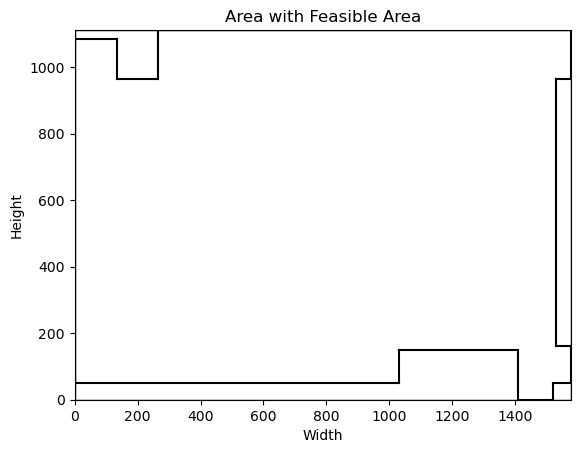

In [6]:
### 創建新圖
fig, ax = plt.subplots()

### 放置物件區域
ax.add_patch(plt.Rectangle((0, 0), max_x, max_y, edgecolor='black', facecolor='none'))

### 繪製 feasible_area
for line in feasible_area:
    x1,y1 = line[0],line[1]
    x2,y2 = line[2],line[3]
    ax.plot([x1, x2], [y1, y2],color='black')


### 設定x,y軸名稱、標題
ax.set_title('Area with Feasible Area')
ax.set_xlabel('Width')
ax.set_ylabel('Height')

### 座標範圍
ax.set_xlim(0, max_x)
ax.set_ylim(0, max_y)

### 顯示圖形
plt.show()

In [7]:
####### 利用shaply尋找需要挖掉的區域
##### 將feasible_area轉換成shapely的Polygon形式
def sort_line(feasible_area):
    result = []
    ### 選定初始點(終點)
    start_x, start_y = feasible_area[0][0],feasible_area[0][1] # 直接選定第一條線段
    result.append((feasible_area[0][0],feasible_area[0][1])) # 第一條線段起點
    result.append((feasible_area[0][2],feasible_area[0][3])) # 第一條線段終點
    
    check_set = np.zeros(len(feasible_area))
    check_set[0] = 1 # 表示已經使用過此線段
    
    closed_area = False ### 確保圍成封閉線段
    
    ### 延著目前座標位置繞行可行解區域一圈形成封閉區域
    while (closed_area == False):
        
        ### 目前座標位置
        search_x = result[len(result)-1][0]
        search_y = result[len(result)-1][1]
        
        ### 檢查是否完成封閉區域(目前座標位置 = 起始點)
        if(search_x == start_x and search_y == start_y):
            closed_area = True
        
        if(closed_area == True):
            break
            
        ### 找下一個 point
        for index,line in enumerate(feasible_area):
            if(check_set[index] == 0): #還沒放
                if(line[0]==search_x and line[1]==search_y):
                    result.append((line[2],line[3]))
                    check_set[index] = 1 
                elif(line[2]==search_x and line[3]==search_y):
                    result.append((line[0],line[1]))
                    check_set[index] = 1 
    return(result)

### 排序線段
sort_feasible_area = sort_line(feasible_area)
print(sort_feasible_area)

[(1578, 1111), (1578, 964), (1530, 964), (1530, 162), (1578, 162), (1578, 50), (1523, 50), (1523, 0), (1409, 0), (1409, 150), (1031, 150), (1031, 49), (0, 49), (0, 1085), (135, 1085), (135, 965), (266, 965), (266, 1111), (1578, 1111)]


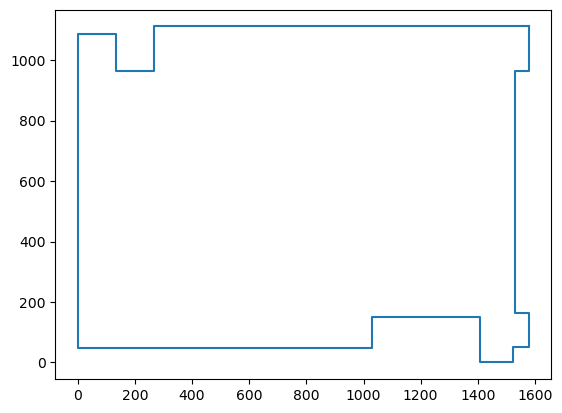

In [8]:
### 確認排序完的結果正確性
poly_feasible = Polygon(sort_feasible_area)
plt.plot(*poly_feasible.exterior.xy)
plt.show()

In [9]:
##### 建立最外圍矩形可行解區域
poly_max = Polygon([(min_x, min_x), (min_x, max_y), (max_x, max_y), (max_x, min_y)])

##### 建立需被挖掉的非可行解區域(最大矩形 - 可行解區域)
poly_empty = poly_max.difference(poly_feasible) # poly_max - poly_feasible

polygons_empty = list(poly_empty.geoms)

# 輸出多個empty_area的POLYGON
for polygon in polygons_empty:
    print(polygon)

POLYGON ((0 49, 1031 49, 1031 150, 1409 150, 1409 0, 0 0, 0 49))
POLYGON ((0 1111, 266 1111, 266 965, 135 965, 135 1085, 0 1085, 0 1111))
POLYGON ((1578 162, 1530 162, 1530 964, 1578 964, 1578 162))
POLYGON ((1578 0, 1523 0, 1523 50, 1578 50, 1578 0))


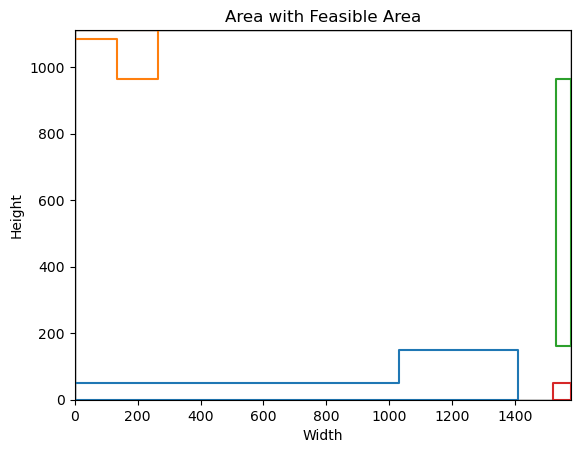

In [10]:
### 創建新圖
fig, ax = plt.subplots()

### 放置物件區域
ax.add_patch(plt.Rectangle((0, 0), max_x, max_y, edgecolor='black', facecolor='none'))

### 繪製empty area
for polygon in polygons_empty: 
    plt.plot(*polygon.exterior.xy)

### 設定x,y軸名稱、標題
ax.set_title('Area with Feasible Area')
ax.set_xlabel('Width')
ax.set_ylabel('Height')

### 座標範圍
ax.set_xlim(0, max_x)
ax.set_ylim(0, max_y)

### 顯示圖形
plt.show()

In [11]:
##### 切割多邊形 確保為矩形
def split_polygon_to_rectangles(polygon):
    left, bottom, right, top = polygon.bounds
    y_coords = sorted(set([bottom, top] + [y for _, y in polygon.exterior.coords]))
    rectangles = []

    for i in range(len(y_coords) - 1):
        y1, y2 = y_coords[i], y_coords[i + 1]
        strip = box(left, y1, right, y2).intersection(polygon)

        if strip.is_empty:
            continue

        if strip.geom_type == 'Polygon':
            strips = [strip]
        elif strip.geom_type == 'MultiPolygon' or strip.geom_type == 'GeometryCollection':
            strips = [geom for geom in strip.geoms if geom.geom_type == 'Polygon']
        else:
            strips = []

        for strip in strips:
            x_coords = sorted(set([left, right] + [x for x, _ in strip.exterior.coords]))

            for j in range(len(x_coords) - 1):
                x1, x2 = x_coords[j], x_coords[j + 1]
                rectangle = box(x1, y1, x2, y2).intersection(strip)

                if not rectangle.is_empty and rectangle.geom_type == 'Polygon':
                    rectangles.append(rectangle)

    return rectangles

In [12]:
####### 確保所有被挖掉的非可行解區域由多個矩形組成
rectangles_empty = []
for polygon in polygons_empty:
    if len(polygon.exterior.coords) != 5: # 4個頂點 + 1(頭尾重複一次)
        polygon_split = split_polygon_to_rectangles(polygon)
        for poly in polygon_split:
            rectangles_empty.append(poly)
    else:
        rectangles_empty.append(polygon)

for poly in rectangles_empty:
    print(poly)

POLYGON ((1031 0, 0 0, 0 49, 1031 49, 1031 0))
POLYGON ((1409 0, 1031 0, 1031 49, 1409 49, 1409 0))
POLYGON ((1409 49, 1031 49, 1031 150, 1409 150, 1409 49))
POLYGON ((266 965, 135 965, 135 1085, 266 1085, 266 965))
POLYGON ((135 1085, 0 1085, 0 1111, 135 1111, 135 1085))
POLYGON ((266 1085, 135 1085, 135 1111, 266 1111, 266 1085))
POLYGON ((1578 162, 1530 162, 1530 964, 1578 964, 1578 162))
POLYGON ((1578 0, 1523 0, 1523 50, 1578 50, 1578 0))


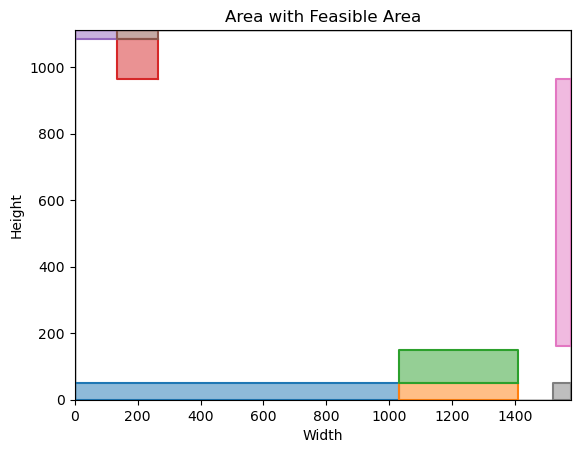

In [13]:
### 創建新圖
fig, ax = plt.subplots()

### 放置物件區域
ax.add_patch(plt.Rectangle((0, 0), max_x, max_y, edgecolor='black', facecolor='none'))

### 繪製empty area
for polygon in rectangles_empty: 
    plt.plot(*polygon.exterior.xy)
    plt.fill(*polygon.exterior.xy, alpha=0.5)
### 設定x,y軸名稱、標題
ax.set_title('Area with Feasible Area')
ax.set_xlabel('Width')
ax.set_ylabel('Height')

### 座標範圍
ax.set_xlim(0, max_x)
ax.set_ylim(0, max_y)

### 顯示圖形
plt.show()

In [14]:
##### 轉換成constraint programming運用的data形式
##### unusable_gridcell的這個格式～
### {0:{'x':0,'y':0,'w':100, 'h':30},
###  1:{'x':500,'y':0,'w':150, 'h':50}}

unusable_gridcell = {}
count = 0

for polygon in rectangles_empty:
    ### 紀錄empty座標位置(左、下、右、上)
    left, bottom, right, top = polygon.bounds
    left, bottom, right, top = int(left), int(bottom), int(right), int(top)
    ### 紀錄位置(x,y)、寬(w)、高(h)
    unusable_gridcell[count] = {'x': left, 'y': bottom, 'w': right - left, 'h': top - bottom}
    count += 1

print(unusable_gridcell)

{0: {'x': 0, 'y': 0, 'w': 1031, 'h': 49}, 1: {'x': 1031, 'y': 0, 'w': 378, 'h': 49}, 2: {'x': 1031, 'y': 49, 'w': 378, 'h': 101}, 3: {'x': 135, 'y': 965, 'w': 131, 'h': 120}, 4: {'x': 0, 'y': 1085, 'w': 135, 'h': 26}, 5: {'x': 135, 'y': 1085, 'w': 131, 'h': 26}, 6: {'x': 1530, 'y': 162, 'w': 48, 'h': 802}, 7: {'x': 1523, 'y': 0, 'w': 55, 'h': 50}}


In [ ]:
# {0: {'x': 0, 'y': 0, 'w': 1031, 'h': 49}, 
#  1: {'x': 1031, 'y': 0, 'w': 378, 'h': 49}, 
#  2: {'x': 1031, 'y': 49, 'w': 378, 'h': 101}, 
#  3: {'x': 135, 'y': 965, 'w': 131, 'h': 120}, 
#  4: {'x': 0, 'y': 1085, 'w': 135, 'h': 26}, 
#  5: {'x': 135, 'y': 1085, 'w': 131, 'h': 26}, 
#  6: {'x': 1530, 'y': 162, 'w': 48, 'h': 802}, 
#  7: {'x': 1523, 'y': 0, 'w': 55, 'h': 50}}